<a href="https://colab.research.google.com/github/snehagandla30/Oasis-Infobyte/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df.csv


Dataset loaded successfully!
Shape:2205rows x 39columns


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0



 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15

,_i_n_c_o_m_e_,_k_i_d_h_o_m_e_,_t_e_e_n_h_o_m_e_,_r_e_c_e_n_c_y_,_m_n_t_w_i_n_e_s_,_m_n_t_f_r_u_i_t_s_,_m_n_t_m_e_a_t_p_r_o_d_u_c_t_s_,_m_n_t_f_i_s_h_p_r_o_d_u_c_t_s_,_m_n_t_s_w_e_e_t_p_r_o_d_u_c_t_s_,_m_n_t_g_o_l_d_p_r_o_d_s_,_n_u_m_d_e_a_l_s_p_u_r_c_h_a_s_e_s_,_n_u_m_w_e_b_p_u_r_c_h_a_s_e_s_,_n_u_m_c_a_t_a_l_o_g_p_u_r_c_h_a_s_e_s_,_n_u_m_s_t_o_r_e_p_u_r_c_h_a_s_e_s_,_n_u_m_w_e_b_v_i_s_i_t_s_m_o_n_t_h_,_a_c_c_e_p_t_e_d_c_m_p_3_,_a_c_c_e_p_t_e_d_c_m_p_4_,_a_c_c_e_p_t_e_d_c_m_p_5_,_a_c_c_e_p_t_e_d_c_m_p_1_,_a_c_c_e_p_t_e_d_c_m_p_2_,_c_o_m_p_l_a_i_n_,_z___c_o_s_t_c_o_n_t_a_c_t_,_z___r_e_v_e_n_u_e_,_r_e_s_p_o_n_s_e_,_a_g_e_,_c_u_s_t_o_m_e_r___d_a_y_s_,_m_a_r_i_t_a_l___d_i_v_o_r_c_e_d_,_m_a_r_i_t_a_l___m_a_r_r_i_e_d_,_m_a_r_i_t_a_l___s_i_n_g_l_e_,_m_a_r_i_t_a_l___t_o_g_e_t_h_e_r_,_m_a_r_i_t_a_l___w_i_d_o_w_,_e_d_u_c_a_t_i_o_n___2_n_ _c_y_c_l_e_,_e_d_u_c_a_t_i_o_n___b_a_s_i_c_,_e_d_u_c_a_t_i_o_n___g_r_a_d_u_a_t_i_o_n_,_e_d_u_c_a_t_i_o_n___m_a_s_t_e_r_,_e_d_u_c_a_t_i_o_n___p_h_d_,_m_n_t_t_o_t_a_l_,_m_n_t_r_e_g_u_l_a_r_p_r_o_d_s_,_a_c_c_e_p_t_e_d_c_m_p_o_v_e_r_a_l_l_
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1


 Preparing features for K-Means clustering
Using39 numeric features for clustering.

 Running Elbow Method to find optimal K


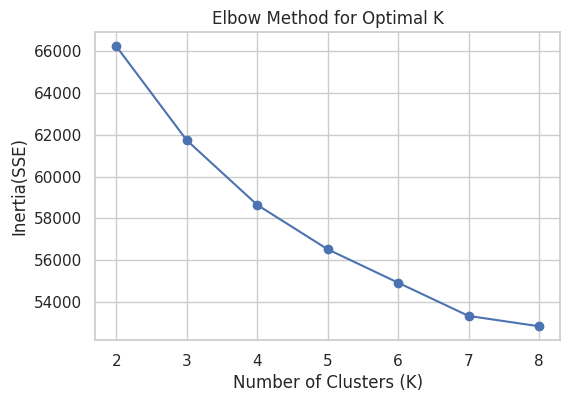

 K-Means clustering completed with 4 clusters.


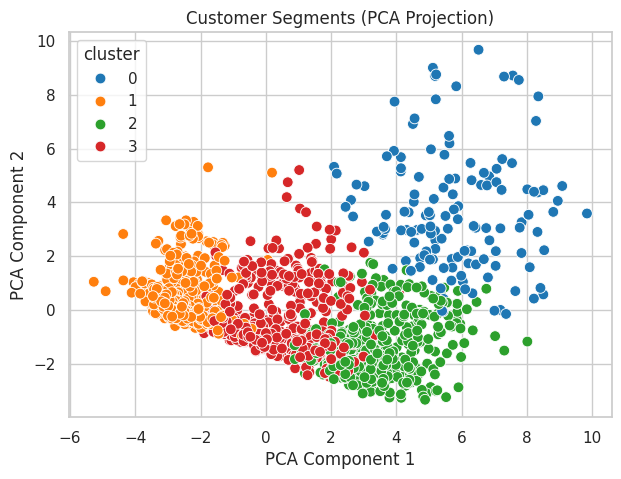


📊 Cluster Profiles (average values per cluster):


,_i_n_c_o_m_e_,_k_i_d_h_o_m_e_,_t_e_e_n_h_o_m_e_,_r_e_c_e_n_c_y_,_m_n_t_w_i_n_e_s_,_m_n_t_f_r_u_i_t_s_,_m_n_t_m_e_a_t_p_r_o_d_u_c_t_s_,_m_n_t_f_i_s_h_p_r_o_d_u_c_t_s_,_m_n_t_s_w_e_e_t_p_r_o_d_u_c_t_s_,_m_n_t_g_o_l_d_p_r_o_d_s_,_n_u_m_d_e_a_l_s_p_u_r_c_h_a_s_e_s_,_n_u_m_w_e_b_p_u_r_c_h_a_s_e_s_,_n_u_m_c_a_t_a_l_o_g_p_u_r_c_h_a_s_e_s_,_n_u_m_s_t_o_r_e_p_u_r_c_h_a_s_e_s_,_n_u_m_w_e_b_v_i_s_i_t_s_m_o_n_t_h_,_a_c_c_e_p_t_e_d_c_m_p_3_,_a_c_c_e_p_t_e_d_c_m_p_4_,_a_c_c_e_p_t_e_d_c_m_p_5_,_a_c_c_e_p_t_e_d_c_m_p_1_,_a_c_c_e_p_t_e_d_c_m_p_2_,_c_o_m_p_l_a_i_n_,_z___c_o_s_t_c_o_n_t_a_c_t_,_z___r_e_v_e_n_u_e_,_r_e_s_p_o_n_s_e_,_a_g_e_,_c_u_s_t_o_m_e_r___d_a_y_s_,_m_a_r_i_t_a_l___d_i_v_o_r_c_e_d_,_m_a_r_i_t_a_l___m_a_r_r_i_e_d_,_m_a_r_i_t_a_l___s_i_n_g_l_e_,_m_a_r_i_t_a_l___t_o_g_e_t_h_e_r_,_m_a_r_i_t_a_l___w_i_d_o_w_,_e_d_u_c_a_t_i_o_n___2_n_ _c_y_c_l_e_,_e_d_u_c_a_t_i_o_n___b_a_s_i_c_,_e_d_u_c_a_t_i_o_n___g_r_a_d_u_a_t_i_o_n_,_e_d_u_c_a_t_i_o_n___m_a_s_t_e_r_,_e_d_u_c_a_t_i_o_n___p_h_d_,_m_n_t_t_o_t_a_l_,_m_n_t_r_e_g_u_l_a_r_p_r_o_d_s_,_a_c_c_e_p_t_e_d_c_m_p_o_v_e_r_a_l_l_
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,81010.01,0.06,0.19,48.45,933.71,51.44,456.01,76.07,58.97,76.48,1.17,5.62,6.13,8.21,3.47,0.19,0.50,0.83,0.57,0.17,0.01,3.0,11.0,0.68,49.10,2534.62,0.09,0.40,0.23,0.24,0.04,0.05,0.00,0.50,0.18,0.26,1576.21,1499.72,2.28
1,33985.97,0.80,0.44,49.21,39.53,4.99,22.80,7.06,5.12,15.52,2.05,2.09,0.53,3.18,6.51,0.08,0.01,0.00,0.00,0.00,0.01,3.0,11.0,0.09,48.00,2481.57,0.10,0.39,0.24,0.25,0.02,0.11,0.05,0.50,0.16,0.19,79.51,63.98,0.09
2,73313.36,0.04,0.24,50.37,536.79,71.90,429.53,104.07,72.12,77.22,1.45,5.22,5.76,8.51,2.95,0.05,0.02,0.07,0.09,0.00,0.01,3.0,11.0,0.16,52.48,2519.80,0.10,0.36,0.24,0.25,0.05,0.10,0.00,0.58,0.12,0.19,1214.40,1137.18,0.23
3,57010.13,0.24,0.92,47.72,418.53,20.41,124.58,27.66,20.82,58.15,3.76,6.25,2.89,7.59,5.70,0.06,0.12,0.01,0.03,0.00,0.01,3.0,11.0,0.11,55.78,2554.69,0.13,0.40,0.16,0.27,0.04,0.06,0.00,0.46,0.21,0.27,612.01,553.86,0.22



 Key Insights & Recommendations:
 Each cluster represents a different type of customer behavior or demographic profile.
 High-income & high-spending clusters can be targeted with premium campaigns.
 Low-income or low-engagement clusters can be reactivated with loyalty offers.
 Analyze product spending patterns (MntWines, MntGoldProds, etc.) for cross-sell potential.
 Age and spending combinations reveal life-stage-based segmentation opportunities.

 customer segmentation (iFood)Project Completed Successfully!


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
sns.set(style="whitegrid")

#Step 1: Load your dataset
file_name = "ifood_df.csv"
df = pd.read_csv(file_name)

print("Dataset loaded successfully!")
print(f"Shape:{df.shape[0]}rows x {df.shape[1]}columns")
display(df.head())

#Step 2: Basic Info & Cleaning
print("\n Dataset information:")
df.info()

print("\n Missing Values per Column:")
print("\n Cleaning Data")

for col in df.select_dtypes(include=['object']).columns:
  df[col].fillna('Unknown', inplace=True)

df.columns = [c.strip().lower().replace('','_') for c in df.columns]
print(" Cleaning done! Remaining missing:", df.isna().sum().sum())

# Step 3: Basic EDA

print("\n Descriptive Statistics:")
display(df.describe())

if 'age' in df.columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df['age'], bins=25, kde=True, color='skyblue')
  plt.title("Age Distribution of Customers")
  plt.xlabel("Age")
  plt.show()

if 'income' in df.columns:
  plt.figure(figsize=(6,4))
  sns.histplot(df['income'], bins=30, kde=True, color='salmon')
  plt.title("Income Distribution of Customers")
  plt.xlabel("Income")
  plt.show()

spending_cols = [c for c in df.columns if c.startswith('mnt')]
if spending_cols:
  plt.figure(figsize=(10,5))
  df[spending_cols].sum().sort_values(ascending=False).plot(kind='bar', color='teal')
  plt.title("Total Spending by Product Type")
  plt.ylabel("Total Amount Spent")
  plt.show()

# Step 4: feature preparation for clustering
print("\n Preparing features for K-Means clustering")
X = df.select_dtypes(include=[np.number])

id_cols = [c for c in X.columns if 'id' in c or 'zip' in c]
X = X.drop(columns=id_cols, errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Using{X.shape[1]} numeric features for clustering.")

# Step 5: Finding Optimal Cluser
print("\n Running Elbow Method to find optimal K")
sse = []
for k in range(2,9):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_scaled)
  sse.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,9), sse, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia(SSE)")
plt.show()

k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal,random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
print(f" K-Means clustering completed with {k_optimal} clusters.")

# Step 6: Visualize Clusters
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=pca_comp[:,0], y=pca_comp[:,1],hue=df['cluster'], palette='tab10', s=60)
plt.title("Customer Segments (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Step 7: cluster profiling

profile = df.groupby('cluster')[X.columns].mean().round(2)
print("\n📊 Cluster Profiles (average values per cluster):")
display(profile)


# Step 8: Insights & Recommendations

print("\n Key Insights & Recommendations:")
print(" Each cluster represents a different type of customer behavior or demographic profile.")
print(" High-income & high-spending clusters can be targeted with premium campaigns.")
print(" Low-income or low-engagement clusters can be reactivated with loyalty offers.")
print(" Analyze product spending patterns (MntWines, MntGoldProds, etc.) for cross-sell potential.")
print(" Age and spending combinations reveal life-stage-based segmentation opportunities.")
print("\n customer segmentation (iFood)Project Completed Successfully!")